Finding two solutions for giving rank to sensors for thier importance.

Import Python Data Analysis Library to extract the features.

In [1]:
import pandas as pd

Import Python Numpy Library to hold a N-dimensional array.

In [2]:
import numpy as np

Read CSV as df to analysis the Dataset.

In [3]:
df=pd.read_csv('../rank-by-importance-and-predictive/DataSet/task_data.csv')

Employing Pandas and Numpy to extract names of each Column and Features and Lables.


In [4]:
sensorsName = np.array(list(df.columns.values))[2:]

In [5]:
sensorReadings = df.as_matrix()[:,2:]

In [6]:
lable = df['class_label'].as_matrix()

Select the features with Scikit-Learn Laibrary.

I am going to rank the importance features by decision trees such as Random Forest or Extra Trees.

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

Create two classifiers used to evaluate a subset of attributes.

In [9]:
rfr = RandomForestRegressor().fit(sensorReadings, lable)

In [10]:
etc = ExtraTreesClassifier().fit(sensorReadings, lable)

Sort the ranking where the first sensor is the most important one in Random Forest Regressor. 

In [11]:
rankByRFR = sorted(zip(map(lambda x: round(x, 2), rfr.feature_importances_), sensorsName), reverse=True)

Sort the ranking where the first sensor is the most important one in Extra Tree.

In [12]:
rankByETC = sorted(zip(map(lambda x: round(x, 2),etc.feature_importances_), sensorsName), reverse=True)

Create an unsorted list for compair both methods for the relative importance.

In [13]:
rankByRFRforVisualize = (rfr.feature_importances_)

In [14]:
rankByETCforVisualize = (etc.feature_importances_)

Here I will show a Visualization of result of the methods. 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Compair both method.

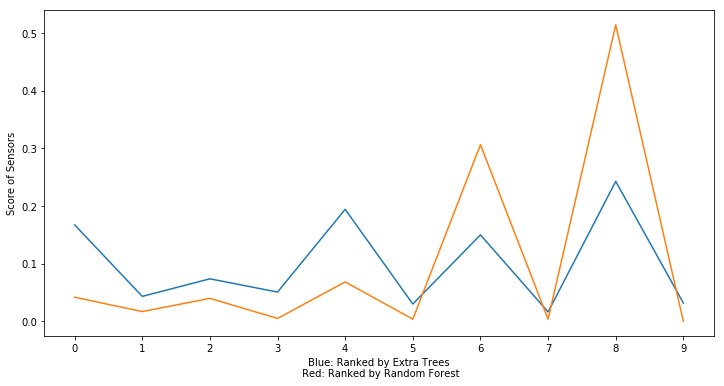

In [16]:
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(len(list(zip(sensorsName)))))
plt.plot(list(zip(rankByETCforVisualize)))
plt.plot(list(zip(rankByRFRforVisualize)))
plt.xlabel('Blue: Ranked by Extra Trees\n Red: Ranked by Random Forest')
plt.ylabel('Score of Sensors')
plt.show()

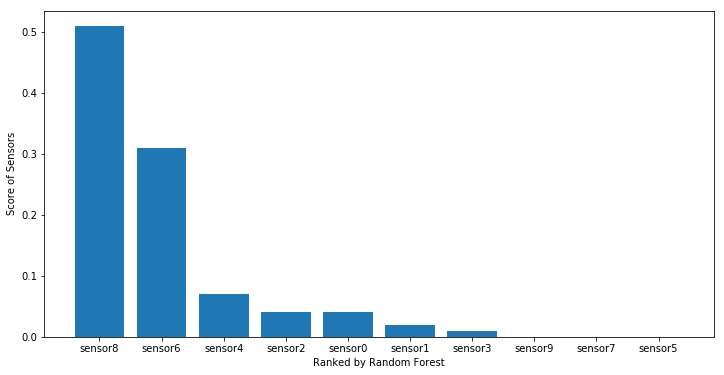

In [17]:
plt.figure(1, figsize=(12, 6))
plt.bar(np.arange(len(list(zip(*rankByRFR))[1])), list(zip(*rankByRFR))[0], align='center')
plt.xticks(np.arange(len(list(zip(*rankByRFR))[1])), list(zip(*rankByRFR))[1]) 
plt.xlabel('Ranked by Random Forest')
plt.ylabel('Score of Sensors')
plt.show()

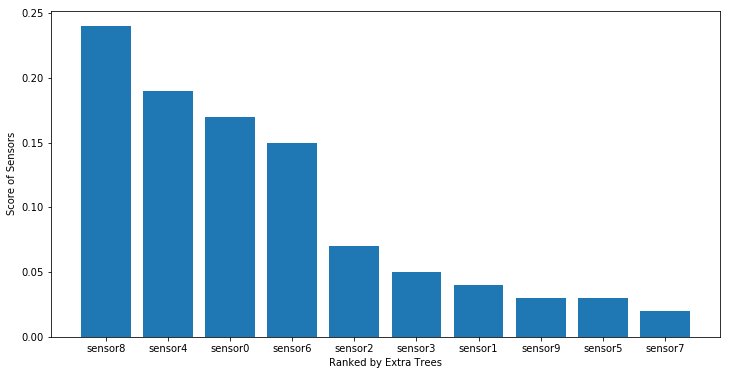

In [18]:
plt.figure(1, figsize=(12, 6))
plt.bar(np.arange(len(list(zip(*rankByETC))[1])), list(zip(*rankByETC))[0], align='center')
plt.xticks(np.arange(len(list(zip(*rankByETC))[1])), list(zip(*rankByETC))[1]) 
plt.xlabel('Ranked by Extra Trees')
plt.ylabel('Score of Sensors')
plt.show()

Save the lists to a CSV file.

In [19]:
import csv
with open('../rank-by-importance-and-predictive/DataSet/rank_by_RandomForestRegressor.csv', 'w', newline='') as out_RandomForestRegressorfile:
    a = csv.writer(out_RandomForestRegressorfile)
    data= rankByRFR
    a.writerows(data)

In [20]:
with open('../rank-by-importance-and-predictive/DataSet/rank_by_ExtraTreesClassifier.csv', 'w', newline='') as out_ETCfile:
    a = csv.writer(out_ETCfile)
    data= rankByETC
    a.writerows(data)